![title](insaid.png)

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [How Height difference affects the outcome of the match?](#section401)<br/>
    - 4.2 [How Reach difference affects the outcome of the match?](#section402)<br/>
    - 4.3 [How Age difference affects the outcome of the match?](#section403)<br/>
    - 4.4 [Does height helps the boxers to wing more dominantly?](#section404)<br/>
    - 4.5 [Does Age helps the boxers to wing more dominantly?](#section405)<br/>
    - 4.6 [Does reach helps the boxers to win more dominantly?](#section406)<br/>
    - 4.7 [How advantage in single physical attribute fare with the outcome of the boxers?](#section407)<br/>
5. [Conclusions](#section5)<br/>  

<a name="section1"></a>
### 1. Problem Statement

__Boxing__ is a combat sport in which two people, usually wearing protective gloves, throw punches at each other for a predetermined amount of time in a boxing ring.

I have always been fascinated, whenever i watch the match to predict who will gonna win the bout. Clearly most of these boxing matches are carried out within the same weight limit to ensure the bout is an equal fight. But still there are various physical attributes in which one fighter has an advantage over the other.

__Over this analysis sheet, we will try to figure out how physical attributes (Age, Height, Reach, Stance) play a crucial in deciding the outcome of the bout.__


![title](boxing_img.jpg)

<a name="section2"></a>

### 2. Data Loading and Description

- The dataset consists of the information about boxing matches. There are various variables present in the dataset includes height, age, range, weight, result etc.. 
- The dataset comprises of __387427 observations of 26 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| age_A         | Age of Boxer A                                            | 
| age_b         | Age of Boxer B                                            |  
| height_A      | Height of Boxer A                                         | 
| height_B      | Height of Boxer B                                         |   
| reach_A       | Reach of boxer A                                          |
| reach_B       | Reach of boxer B                                          |
| stance_A      | Stance of Boxer A                                         |
| stance_B      | Stance of Boxer B                                         |
| weight_A      | Weight of Boxer A                                         |
| weight_B      | Weight of Boxer B                                         |
| won_A      	| Number of wins - Boxer A                                  |
| won_B         | Number of wins - Boxer B                                  |
| lost_A        | Number of losses - Boxer A                                |
| lost_B        | Number of losses - Boxer B                                |
| drawn_A       | Number of draws- Boxer A                                  |
| drawn_B       | Number of draws- Boxer B                                  |
| kos_A         | Number of KOs wins - Boxer A                              |
| kos_B         | Number of KOs wins - Boxer B                              |
| result        | Match Winner - A or B                                     |
| decision      | Outcome of Match                                          |
| judge1_A      | Judge 1 Score for boxer A                                 |
| judge1_B      | Judge 1 Score for boxer B                                 |
| judge2_A      | Judge 2 Score for boxer A                                 |
| judge2_B      | Judge 2 Score for boxer B                                 |
| judge3_A      | Judge 3 Score for boxer A                                 |
| judge3_B      | Judge 3 Score for boxer B                                 |


#### Importing packages                                          

In [1]:
import numpy as np 
import pandas as pd 
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns          
%matplotlib inline
sns.set()

from subprocess import check_output

#### Importing the Dataset

In [2]:
boxing_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/boxing_matches.csv")

<a name="section3"></a>

## 3. Data Profiling

<a name="section301"></a>

### 3.1 Understanding the Dataset


In [3]:
boxing_data.shape

(387427, 26)

So As we see, there are total 387427 records and 26 columns in our Boxing Matches Dataset. Lets see what all parameters we have do analysis

In [4]:
boxing_data.columns

Index(['age_A', 'age_B', 'height_A', 'height_B', 'reach_A', 'reach_B',
       'stance_A', 'stance_B', 'weight_A', 'weight_B', 'won_A', 'won_B',
       'lost_A', 'lost_B', 'drawn_A', 'drawn_B', 'kos_A', 'kos_B', 'result',
       'decision', 'judge1_A', 'judge1_B', 'judge2_A', 'judge2_B', 'judge3_A',
       'judge3_B'],
      dtype='object')

In [5]:
boxing_data.head()

,age_A,age_B,height_A,height_B,reach_A,reach_B,stance_A,stance_B,weight_A,weight_B,...,kos_A,kos_B,result,decision,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
0,35.0,27.0,179.0,175.0,178.0,179.0,orthodox,orthodox,160.0,160.0,...,33,34.0,draw,SD,110.0,118.0,115.0,113.0,114.0,114.0
1,26.0,31.0,175.0,185.0,179.0,185.0,orthodox,orthodox,164.0,164.0,...,34,32.0,win_A,UD,120.0,108.0,120.0,108.0,120.0,108.0
2,28.0,26.0,176.0,175.0,NaN,179.0,orthodox,orthodox,154.0,154.0,...,13,33.0,win_B,KO,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,29.0,175.0,174.0,179.0,180.0,orthodox,orthodox,155.0,155.0,...,32,19.0,win_A,KO,47.0,48.0,49.0,46.0,48.0,47.0
4,25.0,35.0,175.0,170.0,179.0,170.0,orthodox,orthodox,155.0,NaN,...,32,33.0,win_A,UD,118.0,110.0,119.0,109.0,117.0,111.0


In [6]:
boxing_data.describe()

,age_A,age_B,height_A,height_B,reach_A,reach_B,weight_A,weight_B,won_A,won_B,...,drawn_A,drawn_B,kos_A,kos_B,judge1_A,judge1_B,judge2_A,judge2_B,judge3_A,judge3_B
count,352888.000000,257935.000000,249246.000000,134640.000000,112342.000000,37873.000000,135573.000000,130358.000000,387427.000000,387427.000000,...,387427.000000,387427.000000,387427.000000,387348.000000,52248.000000,52060.000000,70371.000000,70032.000000,61231.000000,61023.000000
mean,24.416041,26.583345,172.786657,172.882657,178.848605,179.001030,146.340636,147.089484,23.108438,15.159080,...,2.826481,2.636375,10.338887,6.234735,62.778901,59.509700,59.560941,56.570411,60.784276,57.995215
std,6.523590,11.823224,9.130127,9.430631,12.002404,14.867537,30.240142,30.624890,27.629901,19.938137,...,5.584610,5.027003,12.392049,8.750690,30.337580,29.285058,31.021367,30.260935,31.910461,31.170590
min,-74.000000,-74.000000,2.000000,15.000000,5.000000,1.000000,10.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,23.000000,166.000000,167.000000,170.000000,171.000000,125.000000,126.000000,5.000000,2.000000,...,0.000000,0.000000,2.000000,0.000000,39.000000,37.000000,39.000000,36.000000,39.000000,36.000000
50%,24.000000,26.000000,173.000000,173.000000,178.000000,178.000000,140.000000,140.000000,14.000000,8.000000,...,1.000000,1.000000,6.000000,3.000000,59.000000,54.000000,58.000000,54.000000,58.000000,54.000000
75%,27.000000,30.000000,178.000000,179.000000,185.000000,185.000000,160.000000,160.000000,31.000000,21.000000,...,3.000000,3.000000,14.000000,9.000000,80.000000,79.000000,80.000000,75.000000,80.000000,78.000000
max,1818.000000,2016.000000,255.000000,255.000000,456.000000,456.000000,363.000000,450.000000,332.000000,251.000000,...,77.000000,76.000000,131.000000,128.000000,540.000000,291.000000,299.000000,294.000000,300.000000,295.000000


From the description above, we can see that there are few outliers/issues with the data. Foloowing inference can be drawn:
1. Minimum age_A is -74 which is not possible
2. Maximum Height is 1818 and 2016 which is not possible.
3. Minimum Reach as 2 and 15 cm, which is not possible.
4. Minimum Weight 10 and 2, not possible.
5. Cleary many missing records in physical attributes columns, as total number of records are 387427


In [7]:
boxing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387427 entries, 0 to 387426
Data columns (total 26 columns):
age_A       352888 non-null float64
age_B       257935 non-null float64
height_A    249246 non-null float64
height_B    134640 non-null float64
reach_A     112342 non-null float64
reach_B     37873 non-null float64
stance_A    231009 non-null object
stance_B    231009 non-null object
weight_A    135573 non-null float64
weight_B    130358 non-null float64
won_A       387427 non-null int64
won_B       387427 non-null int64
lost_A      387427 non-null int64
lost_B      387427 non-null int64
drawn_A     387427 non-null int64
drawn_B     387427 non-null int64
kos_A       387427 non-null int64
kos_B       387348 non-null float64
result      387427 non-null object
decision    387427 non-null object
judge1_A    52248 non-null float64
judge1_B    52060 non-null float64
judge2_A    70371 non-null float64
judge2_B    70032 non-null float64
judge3_A    61231 non-null float64
judge3_B    6

The data description above, shows we dont have null values for result outcome. Which is a good sign for us since based on that we wil decide what impact does other parameters play on it.

__Since we are only taking into account the impact of physical attributes, so we will neglect other columns like judge1_A,
judge1_b, judge2_A, judge2_b, judge3_A, judge3_b as out come of the match enough for us to do analysis and not how judge score them.__

__Also we will neglect previous track record of the fighter as we are clearly taking into account the impact of physical attributes, So we will also neglect columns like won_A, won_B, kos_A, kos_B, lost_A, lost_B, drawn_A and drawn_B__


In [8]:
boxing_data.drop(['judge1_A','judge1_B','judge2_A','judge2_B','judge3_A','judge3_B','kos_A','kos_B','won_A','won_B','lost_A','lost_B','drawn_A','drawn_B'], axis=1,inplace=True)

In [9]:
boxing_data.shape

(387427, 12)

In [10]:
boxing_data.columns

Index(['age_A', 'age_B', 'height_A', 'height_B', 'reach_A', 'reach_B',
       'stance_A', 'stance_B', 'weight_A', 'weight_B', 'result', 'decision'],
      dtype='object')

__We are also eliminating weight for the boxers as they are generally in the same weigh class and there is not much difference in weight__

In [11]:
boxing_data.drop(['weight_A','weight_B'], axis=1,inplace=True)

In [12]:
boxing_data.columns

Index(['age_A', 'age_B', 'height_A', 'height_B', 'reach_A', 'reach_B',
       'stance_A', 'stance_B', 'result', 'decision'],
      dtype='object')

In [13]:
boxing_data.shape

(387427, 10)

__We will delete all those columns which have values missing for both Fighter A and B. Since we will have no criteria to measure the impact of that pysical attribute on the outcome of the match. We will do it for age, height, stance and reach.__

In [14]:
boxing_data.dropna(subset=['age_A','age_B'], how='all', inplace=True)


In [15]:
boxing_data.shape

(369128, 10)

In [16]:
boxing_data.dropna(subset=['height_A','height_B'], how='all', inplace=True)

In [17]:
boxing_data.dropna(subset=['reach_A','reach_B'], how='all', inplace=True)

In [18]:
boxing_data.dropna(subset=['stance_A','stance_B'], how='all', inplace=True)

In [19]:
boxing_data.shape

(104088, 10)

In [20]:
boxing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104088 entries, 0 to 387167
Data columns (total 10 columns):
age_A       103628 non-null float64
age_B       79322 non-null float64
height_A    101588 non-null float64
height_B    53388 non-null float64
reach_A     95490 non-null float64
reach_B     28198 non-null float64
stance_A    104088 non-null object
stance_B    104088 non-null object
result      104088 non-null object
decision    104088 non-null object
dtypes: float64(6), object(4)
memory usage: 8.7+ MB


Lets just see , that how many rows have atleast 1 value as null. Lets check that if we eliminate that, then still would we have enough rows/records to do our analysis?

Initiall we started with __387427__ records. So the minimum records that we should have in our sample should be not less that square root of the poluation size i.e roughly 623 records.

In [21]:
boxing_data.dropna(how='any').shape

(19238, 10)

Observation: We would have roughly __19238 records__ still left. That will be enough for us come up with the analysis

In [22]:
boxing_data.dropna(how='any', inplace=True)

In [23]:
boxing_data.shape

(19238, 10)

<a name="section302"></a>

### 3.2 Pre Profiling

In [24]:
profile=pandas_profiling.ProfileReport(boxing_data)
profile.to_file(output_file="boxing_before_preprocessing.html")

<a name="section303"></a>

### 3.3 Preprocessing

__Observation1:__ After going through the profiling report, we realise that there are some discreprencies in the age column where we see some boxers having age less that 16 and some have age greater that 50. So we thought of simply eliminating them as they are less in number.

In [25]:
boxing_data=boxing_data[boxing_data.age_A > 16]
boxing_data=boxing_data[boxing_data.age_A < 50]
boxing_data.shape

(19197, 10)

In [26]:
boxing_data=boxing_data[boxing_data.age_B > 16]
boxing_data=boxing_data[boxing_data.age_B < 50]
boxing_data.shape

(19139, 10)

__Observation2:__ We also saw one strange relation between stance of boxer A and B. We came to know that stance of both the boxers are same in each scenario. Hence we cannot draw any inference from these columns. So better we delete the same.

In [27]:
boxing_data.drop(['stance_A','stance_B'],axis=1,inplace=True)

In [28]:
boxing_data.shape

(19139, 8)

In [29]:
boxing_data.columns

Index(['age_A', 'age_B', 'height_A', 'height_B', 'reach_A', 'reach_B',
       'result', 'decision'],
      dtype='object')

In [30]:
boxing_data.head()

,age_A,age_B,height_A,height_B,reach_A,reach_B,result,decision
0,35.0,27.0,179.0,175.0,178.0,179.0,draw,SD
1,26.0,31.0,175.0,185.0,179.0,185.0,win_A,UD
3,25.0,29.0,175.0,174.0,179.0,180.0,win_A,KO
4,25.0,35.0,175.0,170.0,179.0,170.0,win_A,UD
5,24.0,31.0,175.0,175.0,179.0,178.0,win_A,KO


__Observation 3:__ As we had deleted the data, so we see inconsistency in the index values (3 coming after 1). So lets just reset the index values

In [31]:
boxing_data.reset_index(inplace=True)

In [32]:
boxing_data.head()

,index,age_A,age_B,height_A,height_B,reach_A,reach_B,result,decision
0,0,35.0,27.0,179.0,175.0,178.0,179.0,draw,SD
1,1,26.0,31.0,175.0,185.0,179.0,185.0,win_A,UD
2,3,25.0,29.0,175.0,174.0,179.0,180.0,win_A,KO
3,4,25.0,35.0,175.0,170.0,179.0,170.0,win_A,UD
4,5,24.0,31.0,175.0,175.0,179.0,178.0,win_A,KO


__Observation 4:__ In the pre-processing profile report, we see extreme values of reach for both fighter, which are not possible. Since they are less in number, we will simply delete the same

In [33]:
boxing_data.set_index('reach_A',inplace=True)

In [34]:
boxing_data.head()

,index,age_A,age_B,height_A,height_B,reach_B,result,decision
reach_A,,,,,,,,
178.0,0,35.0,27.0,179.0,175.0,179.0,draw,SD
179.0,1,26.0,31.0,175.0,185.0,185.0,win_A,UD
179.0,3,25.0,29.0,175.0,174.0,180.0,win_A,KO
179.0,4,25.0,35.0,175.0,170.0,170.0,win_A,UD
179.0,5,24.0,31.0,175.0,175.0,178.0,win_A,KO


In [35]:
boxing_data.drop(58,inplace=True)
boxing_data.drop(69,inplace=True)
boxing_data.drop(73,inplace=True)
boxing_data.drop(98,inplace=True)
boxing_data.drop(456,inplace=True)
boxing_data.drop(427,inplace=True)

In [36]:
boxing_data.head()

,index,age_A,age_B,height_A,height_B,reach_B,result,decision
reach_A,,,,,,,,
178.0,0,35.0,27.0,179.0,175.0,179.0,draw,SD
179.0,1,26.0,31.0,175.0,185.0,185.0,win_A,UD
179.0,3,25.0,29.0,175.0,174.0,180.0,win_A,KO
179.0,4,25.0,35.0,175.0,170.0,170.0,win_A,UD
179.0,5,24.0,31.0,175.0,175.0,178.0,win_A,KO


In [37]:
boxing_data.reset_index(inplace=True)
boxing_data.head()

,reach_A,index,age_A,age_B,height_A,height_B,reach_B,result,decision
0,178.0,0,35.0,27.0,179.0,175.0,179.0,draw,SD
1,179.0,1,26.0,31.0,175.0,185.0,185.0,win_A,UD
2,179.0,3,25.0,29.0,175.0,174.0,180.0,win_A,KO
3,179.0,4,25.0,35.0,175.0,170.0,170.0,win_A,UD
4,179.0,5,24.0,31.0,175.0,175.0,178.0,win_A,KO


Lets just remove the old index values which has come up as an additional column and thus causing confusion

In [38]:
boxing_data.drop('index',axis=1,inplace=True)

In [39]:
boxing_data.head()

,reach_A,age_A,age_B,height_A,height_B,reach_B,result,decision
0,178.0,35.0,27.0,179.0,175.0,179.0,draw,SD
1,179.0,26.0,31.0,175.0,185.0,185.0,win_A,UD
2,179.0,25.0,29.0,175.0,174.0,180.0,win_A,KO
3,179.0,25.0,35.0,175.0,170.0,170.0,win_A,UD
4,179.0,24.0,31.0,175.0,175.0,178.0,win_A,KO


Now lets move on with removing improbable extreme values of reach_B

In [40]:
boxing_data.set_index('reach_B',inplace=True)

In [41]:
boxing_data.drop(1,inplace=True)
boxing_data.drop(24,inplace=True)
boxing_data.drop(25,inplace=True)
boxing_data.drop(26,inplace=True)
boxing_data.drop(27,inplace=True)
boxing_data.drop(456,inplace=True)
boxing_data.drop(439,inplace=True)
boxing_data.drop(229,inplace=True)

In [42]:
boxing_data.head()

,reach_A,age_A,age_B,height_A,height_B,result,decision
reach_B,,,,,,,
179.0,178.0,35.0,27.0,179.0,175.0,draw,SD
185.0,179.0,26.0,31.0,175.0,185.0,win_A,UD
180.0,179.0,25.0,29.0,175.0,174.0,win_A,KO
170.0,179.0,25.0,35.0,175.0,170.0,win_A,UD
178.0,179.0,24.0,31.0,175.0,175.0,win_A,KO


In [43]:
boxing_data.reset_index(inplace=True)
boxing_data.head()

,reach_B,reach_A,age_A,age_B,height_A,height_B,result,decision
0,179.0,178.0,35.0,27.0,179.0,175.0,draw,SD
1,185.0,179.0,26.0,31.0,175.0,185.0,win_A,UD
2,180.0,179.0,25.0,29.0,175.0,174.0,win_A,KO
3,170.0,179.0,25.0,35.0,175.0,170.0,win_A,UD
4,178.0,179.0,24.0,31.0,175.0,175.0,win_A,KO


In [44]:
boxing_data.shape

(19102, 8)

Now lets just get an overview of the data after cleaning it, before going for profile report generation

In [45]:
boxing_data.describe()

,reach_B,reach_A,age_A,age_B,height_A,height_B
count,19102.000000,19102.000000,19102.000000,19102.000000,19102.000000,19102.000000
mean,180.280599,181.034918,26.797089,28.393781,175.888179,175.117632
std,12.063889,11.435723,5.049504,5.150202,9.320125,9.128505
min,58.000000,150.000000,17.000000,17.000000,148.000000,148.000000
25%,173.000000,173.000000,23.000000,25.000000,170.000000,168.000000
50%,179.000000,180.000000,26.000000,28.000000,175.000000,175.000000
75%,188.000000,188.000000,30.000000,32.000000,182.000000,180.000000
max,224.000000,224.000000,49.000000,49.000000,213.000000,213.000000


<a name="section304"></a>

## 3.4 Post Pandas Profiling

In [46]:
profile=pandas_profiling.ProfileReport(boxing_data)
profile.to_file(output_file='boxing_after_preprocessing.html')

<a name="section4"></a>


### 4. Questions

<a name="section401"></a>


### 4.1 __How Height difference affects the outcome of the match?__


We will create a new column which will contain the height difference between the two boxers.

In [47]:
boxing_data['height_diff']=boxing_data['height_A'] - boxing_data['height_B']
boxing_data.head()

,reach_B,reach_A,age_A,age_B,height_A,height_B,result,decision,height_diff
0,179.0,178.0,35.0,27.0,179.0,175.0,draw,SD,4.0
1,185.0,179.0,26.0,31.0,175.0,185.0,win_A,UD,-10.0
2,180.0,179.0,25.0,29.0,175.0,174.0,win_A,KO,1.0
3,170.0,179.0,25.0,35.0,175.0,170.0,win_A,UD,5.0
4,178.0,179.0,24.0,31.0,175.0,175.0,win_A,KO,0.0


Text(0.5, 1.0, 'More_Height')

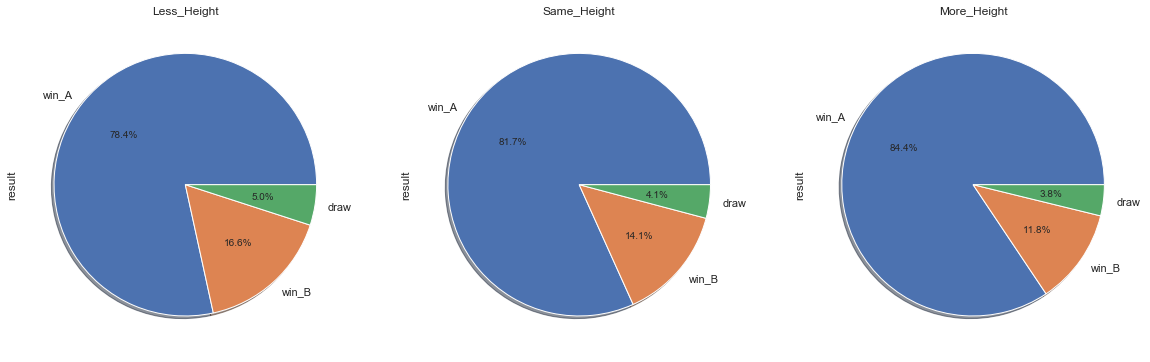

In [48]:
f,ax = plt.subplots(1,3,figsize=(20,7))

#boxing_data['result'][boxing_data['height_diff'] < 0].value_counts().plot.pie()
#boxing_data['result'][boxing_data['height_diff'] < 0].value_counts().plot.pie()


boxing_data['result'][boxing_data['height_diff'] < 0].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
boxing_data['result'][boxing_data['height_diff'] == 0].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
boxing_data['result'][boxing_data['height_diff'] > 0].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('Less_Height')
ax[1].set_title('Same_Height')
ax[2].set_title('More_Height')

__Observation:__ As we can clearly see, the win percentage of boxer A is clearly on the rise from 78.4 to 81.7 to 84.4, as the height of the boxer A increases.


<a name="section402"></a>
### 4.2 __How Reach difference affects the outcome of the match?__


We will create a new column which will contain the Reach difference between the two boxers.

In [49]:
boxing_data['reach_diff']=boxing_data['reach_A'] - boxing_data['reach_B']
boxing_data.head()

,reach_B,reach_A,age_A,age_B,height_A,height_B,result,decision,height_diff,reach_diff
0,179.0,178.0,35.0,27.0,179.0,175.0,draw,SD,4.0,-1.0
1,185.0,179.0,26.0,31.0,175.0,185.0,win_A,UD,-10.0,-6.0
2,180.0,179.0,25.0,29.0,175.0,174.0,win_A,KO,1.0,-1.0
3,170.0,179.0,25.0,35.0,175.0,170.0,win_A,UD,5.0,9.0
4,178.0,179.0,24.0,31.0,175.0,175.0,win_A,KO,0.0,1.0


Text(0.5, 1.0, 'More Reach')

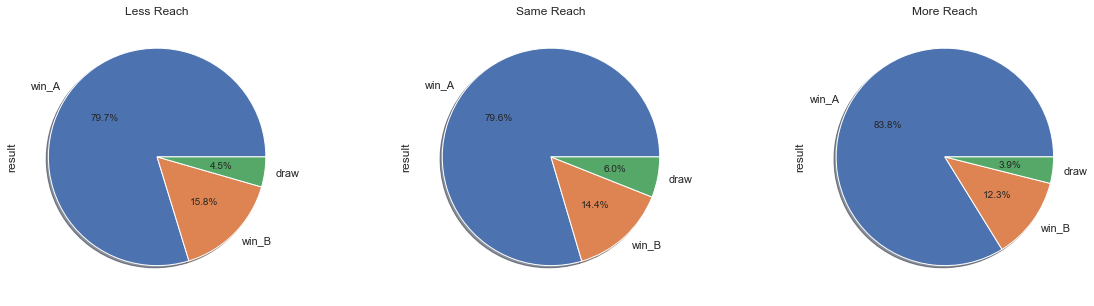

In [50]:
f,ax = plt.subplots(1,3,figsize=(20,5))

#boxing_data['result'][boxing_data['height_diff'] < 0].value_counts().plot.pie()
#boxing_data['result'][boxing_data['height_diff'] < 0].value_counts().plot.pie()


boxing_data['result'][boxing_data['reach_diff'] < 0].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
boxing_data['result'][boxing_data['reach_diff'] == 0].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
boxing_data['result'][boxing_data['reach_diff'] > 0].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('Less Reach')
ax[1].set_title('Same Reach')
ax[2].set_title('More Reach')

__Observation:__ As we can clearly see, the win percentage of boxer A is clearly on the rise from 79.7 to 83.8, as the height of the boxer A increases. However their is slight decrease when the boxers have same reach. But there is also a decrease in loss percentage. So it should be having good impact but not as much


<a name="section403"></a>

### 4.3 __How Age difference affects the outcome of the match?__


We will create a new column which will contain the age difference between the two boxers.

In [51]:
boxing_data['age_diff']=boxing_data['age_A'] - boxing_data['age_B']
boxing_data.head()

,reach_B,reach_A,age_A,age_B,height_A,height_B,result,decision,height_diff,reach_diff,age_diff
0,179.0,178.0,35.0,27.0,179.0,175.0,draw,SD,4.0,-1.0,8.0
1,185.0,179.0,26.0,31.0,175.0,185.0,win_A,UD,-10.0,-6.0,-5.0
2,180.0,179.0,25.0,29.0,175.0,174.0,win_A,KO,1.0,-1.0,-4.0
3,170.0,179.0,25.0,35.0,175.0,170.0,win_A,UD,5.0,9.0,-10.0
4,178.0,179.0,24.0,31.0,175.0,175.0,win_A,KO,0.0,1.0,-7.0


Text(0.5, 1.0, 'Elder')

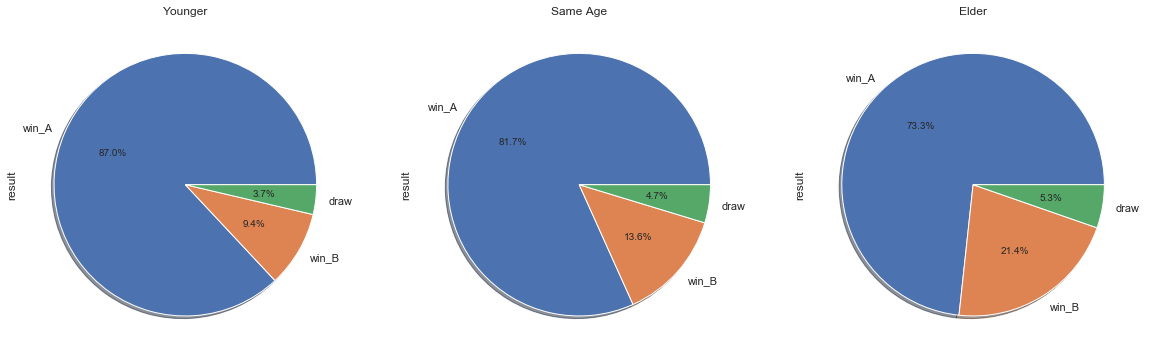

In [52]:
f,ax = plt.subplots(1,3,figsize=(20,7))

#boxing_data['result'][boxing_data['height_diff'] < 0].value_counts().plot.pie()
#boxing_data['result'][boxing_data['height_diff'] < 0].value_counts().plot.pie()


boxing_data['result'][boxing_data['age_diff'] < 0].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
boxing_data['result'][boxing_data['age_diff'] == 0].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
boxing_data['result'][boxing_data['age_diff'] > 0].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('Younger')
ax[1].set_title('Same Age')
ax[2].set_title('Elder')

__Observation:__ Here also as we speak, the winning percentage of Fighter A has increased from 73.3 % to 87% when Fighter A is younger than Fighter B. Clearly it seems this is a young man's sport.


<a name="section404"></a>

### 4.4 __Does height helps the boxers to win more dominantly?__


We will consider victory by KO, TKO and RTD as dominant victories and categorise these as stoppage victories. While other victories as Decision and Others

In [53]:

def decision_take(x):
    if (x=='KO' or x=='TKO' or x=='RTD'):
        return 'Stoppage'
    if (x=='TD' or x=='DQ'):
        return 'Others'
    return 'Decision'

boxing_data['decision_new']=boxing_data['decision'].apply(decision_take)
    

In [54]:
boxing_data.head(10)

,reach_B,reach_A,age_A,age_B,height_A,height_B,result,decision,height_diff,reach_diff,age_diff,decision_new
0,179.0,178.0,35.0,27.0,179.0,175.0,draw,SD,4.0,-1.0,8.0,Decision
1,185.0,179.0,26.0,31.0,175.0,185.0,win_A,UD,-10.0,-6.0,-5.0,Decision
2,180.0,179.0,25.0,29.0,175.0,174.0,win_A,KO,1.0,-1.0,-4.0,Stoppage
3,170.0,179.0,25.0,35.0,175.0,170.0,win_A,UD,5.0,9.0,-10.0,Decision
4,178.0,179.0,24.0,31.0,175.0,175.0,win_A,KO,0.0,1.0,-7.0,Stoppage
5,188.0,179.0,23.0,31.0,175.0,175.0,win_A,SD,0.0,-9.0,-8.0,Decision
6,175.0,179.0,23.0,31.0,175.0,177.0,win_A,TKO,-2.0,4.0,-8.0,Stoppage
7,179.0,183.0,36.0,23.0,173.0,175.0,win_A,MD,-2.0,4.0,13.0,Decision
8,179.0,183.0,27.0,22.0,177.0,175.0,win_B,UD,2.0,4.0,5.0,Decision
9,175.0,179.0,22.0,28.0,175.0,177.0,win_A,TKO,-2.0,4.0,-6.0,Stoppage


To elaborate the data even further, we will add a new column which give details whether boxer A is shorter/taller, Younger/Older or has more/less reach than Boxer B.

In [55]:
def height_take(x):
    if (x<0):
        return 'Short'
    if (x==0):
        return 'Same'
    return 'Tall'

boxing_data['height_dec']=boxing_data['height_diff'].apply(height_take)

In [56]:
def age_take(x):
    if (x<0):
        return 'Younger'
    if (x==0):
        return 'Same'
    return 'Older'

boxing_data['age_dec']=boxing_data['age_diff'].apply(age_take)

In [57]:
def reach_take(x):
    if (x<0):
        return 'Short'
    if (x==0):
        return 'Same'
    return 'Long'

boxing_data['reach_dec']=boxing_data['reach_diff'].apply(reach_take)

In [58]:
boxing_data.head(10)

,reach_B,reach_A,age_A,age_B,height_A,height_B,result,decision,height_diff,reach_diff,age_diff,decision_new,height_dec,age_dec,reach_dec
0,179.0,178.0,35.0,27.0,179.0,175.0,draw,SD,4.0,-1.0,8.0,Decision,Tall,Older,Short
1,185.0,179.0,26.0,31.0,175.0,185.0,win_A,UD,-10.0,-6.0,-5.0,Decision,Short,Younger,Short
2,180.0,179.0,25.0,29.0,175.0,174.0,win_A,KO,1.0,-1.0,-4.0,Stoppage,Tall,Younger,Short
3,170.0,179.0,25.0,35.0,175.0,170.0,win_A,UD,5.0,9.0,-10.0,Decision,Tall,Younger,Long
4,178.0,179.0,24.0,31.0,175.0,175.0,win_A,KO,0.0,1.0,-7.0,Stoppage,Same,Younger,Long
5,188.0,179.0,23.0,31.0,175.0,175.0,win_A,SD,0.0,-9.0,-8.0,Decision,Same,Younger,Short
6,175.0,179.0,23.0,31.0,175.0,177.0,win_A,TKO,-2.0,4.0,-8.0,Stoppage,Short,Younger,Long
7,179.0,183.0,36.0,23.0,173.0,175.0,win_A,MD,-2.0,4.0,13.0,Decision,Short,Older,Long
8,179.0,183.0,27.0,22.0,177.0,175.0,win_B,UD,2.0,4.0,5.0,Decision,Tall,Older,Long
9,175.0,179.0,22.0,28.0,175.0,177.0,win_A,TKO,-2.0,4.0,-6.0,Stoppage,Short,Younger,Long


Since we want to check whether Boxer A is winning more dominanalty if physical attributes favours him, hence we will take only those data where Boxer A is winning, so that we can check if the boxer A is winning better if he has the physical advantage.

In [59]:
boxing_data_new=boxing_data[boxing_data['result']=='win_A']

In [60]:
boxing_data_new.head(10)

,reach_B,reach_A,age_A,age_B,height_A,height_B,result,decision,height_diff,reach_diff,age_diff,decision_new,height_dec,age_dec,reach_dec
1,185.0,179.0,26.0,31.0,175.0,185.0,win_A,UD,-10.0,-6.0,-5.0,Decision,Short,Younger,Short
2,180.0,179.0,25.0,29.0,175.0,174.0,win_A,KO,1.0,-1.0,-4.0,Stoppage,Tall,Younger,Short
3,170.0,179.0,25.0,35.0,175.0,170.0,win_A,UD,5.0,9.0,-10.0,Decision,Tall,Younger,Long
4,178.0,179.0,24.0,31.0,175.0,175.0,win_A,KO,0.0,1.0,-7.0,Stoppage,Same,Younger,Long
5,188.0,179.0,23.0,31.0,175.0,175.0,win_A,SD,0.0,-9.0,-8.0,Decision,Same,Younger,Short
6,175.0,179.0,23.0,31.0,175.0,177.0,win_A,TKO,-2.0,4.0,-8.0,Stoppage,Short,Younger,Long
7,179.0,183.0,36.0,23.0,173.0,175.0,win_A,MD,-2.0,4.0,13.0,Decision,Short,Older,Long
9,175.0,179.0,22.0,28.0,175.0,177.0,win_A,TKO,-2.0,4.0,-6.0,Stoppage,Short,Younger,Long
10,180.0,179.0,21.0,40.0,175.0,174.0,win_A,UD,1.0,-1.0,-19.0,Decision,Tall,Younger,Short
11,188.0,179.0,21.0,32.0,175.0,180.0,win_A,TKO,-5.0,-9.0,-11.0,Stoppage,Short,Younger,Short


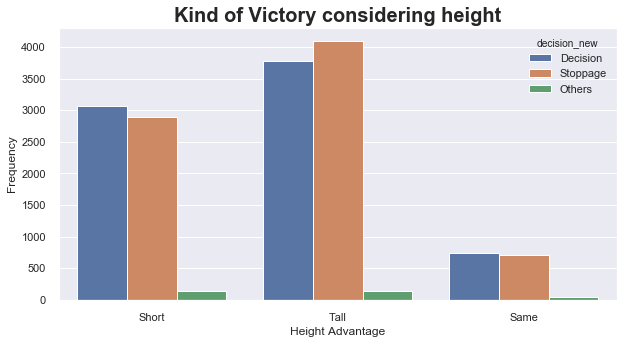

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(x="height_dec", hue="decision_new", data=boxing_data_new)
plt.title("Kind of Victory considering height",fontsize=20,fontweight="bold")
plt.ylabel("Frequency")
plt.xlabel("Height Advantage")
plt.show()

__Observation:__ If we see, when height is more, we see more stoppage victories than decision, meaning fight is won with more dominance

<a name="section405"></a>

### 4.5 __Does Age helps the boxers to win more dominantly?__

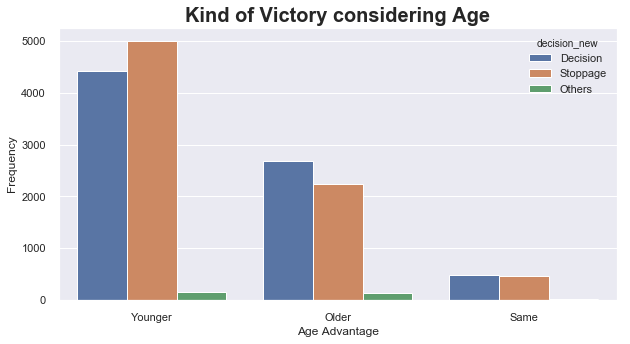

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(x="age_dec", hue="decision_new", data=boxing_data_new)
plt.title("Kind of Victory considering Age",fontsize=20,fontweight="bold")
plt.ylabel("Frequency")
plt.xlabel("Age Advantage")
plt.show()

__Observation:__ We similar relationship. When the fighter is younger and wins, he is more likely to get a stoppage victory

<a name="section406"></a>

### 4.6 __Does reach helps the boxers to win more dominantly?__

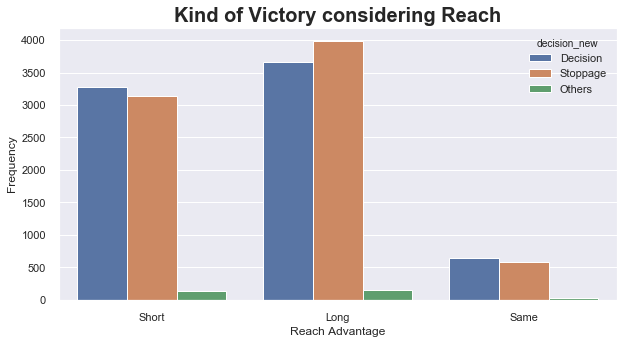

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(x="reach_dec", hue="decision_new", data=boxing_data_new)
plt.title("Kind of Victory considering Reach",fontsize=20,fontweight="bold")
plt.ylabel("Frequency")
plt.xlabel("Reach Advantage")
plt.show()

__Observation:__ We see similar relationship. When the fighter has reach advantage and he wins, he is more likely to get a stoppage victory

<a name="section407"></a>

### 4.7 __How advantage in single physical attribute fare with the outcome of the boxers?__

__Lets first compare height and keep other attributes as same between the boxers..__

In [64]:
boxing_data_temp=boxing_data[boxing_data['age_dec']=='Same']
boxing_data_height=boxing_data_temp[boxing_data_temp['reach_dec']=='Same']


In [65]:
boxing_data_height.sample(5)

,reach_B,reach_A,age_A,age_B,height_A,height_B,result,decision,height_diff,reach_diff,age_diff,decision_new,height_dec,age_dec,reach_dec
680,194.0,194.0,26.0,26.0,185.0,185.0,win_A,TKO,0.0,0.0,0.0,Stoppage,Same,Same,Same
2245,173.0,173.0,26.0,26.0,168.0,166.0,win_A,SD,2.0,0.0,0.0,Decision,Tall,Same,Same
17991,185.0,185.0,25.0,25.0,175.0,173.0,win_A,SD,2.0,0.0,0.0,Decision,Tall,Same,Same
3349,170.0,170.0,23.0,23.0,173.0,175.0,win_A,RTD,-2.0,0.0,0.0,Stoppage,Short,Same,Same
1913,193.0,193.0,28.0,28.0,192.0,191.0,win_B,TKO,1.0,0.0,0.0,Stoppage,Tall,Same,Same


Text(0.5, 1.0, 'Tall')

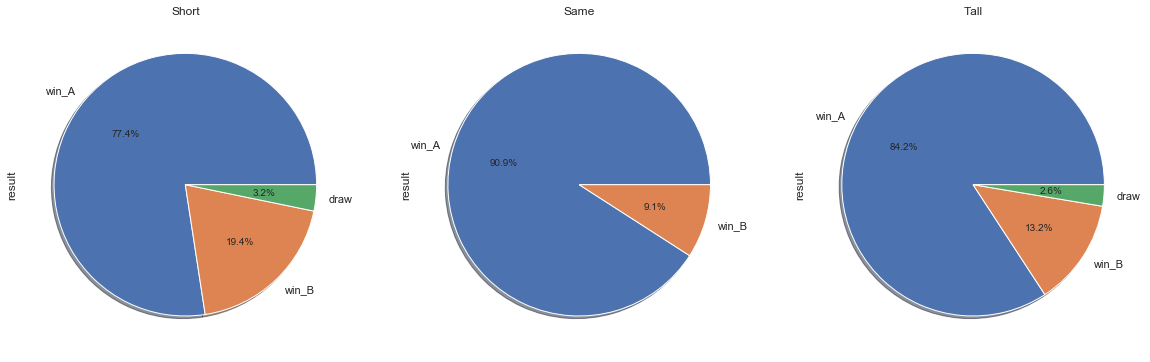

In [66]:
f,ax = plt.subplots(1,3,figsize=(20,7))

#boxing_data['result'][boxing_data['height_diff'] < 0].value_counts().plot.pie()
#boxing_data['result'][boxing_data['height_diff'] < 0].value_counts().plot.pie()


boxing_data_height['result'][boxing_data_height['height_dec'] == 'Short'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
boxing_data_height['result'][boxing_data_height['height_dec'] == 'Same'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
boxing_data_height['result'][boxing_data_height['height_dec'] == 'Tall'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('Short')
ax[1].set_title('Same')
ax[2].set_title('Tall')

__Observation:__ We are seeing a slight mismatch here. However when boxer A is shorter than B, it has won less. But certainly we see Boxer A winning more bouts when the height is same

__Lets compare with Age now and keep other attributes as same between the boxers...__

In [67]:
boxing_data_temp=boxing_data[boxing_data['height_dec']=='Same']
boxing_data_age=boxing_data_temp[boxing_data_temp['reach_dec']=='Same']


In [68]:
boxing_data_age.sample(5)

,reach_B,reach_A,age_A,age_B,height_A,height_B,result,decision,height_diff,reach_diff,age_diff,decision_new,height_dec,age_dec,reach_dec
5274,178.0,178.0,27.0,25.0,170.0,170.0,win_A,TKO,0.0,0.0,2.0,Stoppage,Same,Older,Same
17074,175.0,175.0,27.0,30.0,171.0,171.0,win_A,PTS,0.0,0.0,-3.0,Decision,Same,Younger,Same
451,175.0,175.0,29.0,27.0,173.0,173.0,win_A,KO,0.0,0.0,2.0,Stoppage,Same,Older,Same
16888,168.0,168.0,33.0,24.0,163.0,163.0,win_A,PTS,0.0,0.0,9.0,Decision,Same,Older,Same
4505,175.0,175.0,23.0,28.0,170.0,170.0,win_B,UD,0.0,0.0,-5.0,Decision,Same,Younger,Same


Text(0.5, 1.0, 'Older')

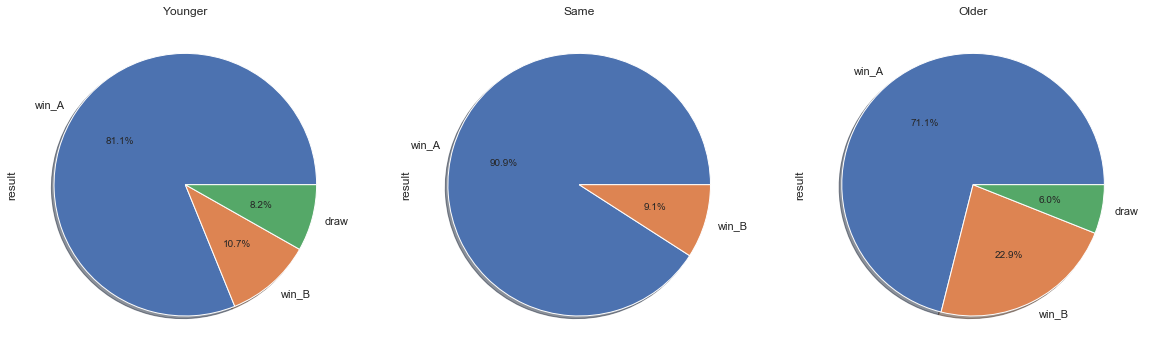

In [69]:
f,ax = plt.subplots(1,3,figsize=(20,7))

#boxing_data['result'][boxing_data['height_diff'] < 0].value_counts().plot.pie()
#boxing_data['result'][boxing_data['height_diff'] < 0].value_counts().plot.pie()


boxing_data_age['result'][boxing_data_age['age_dec'] == 'Younger'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
boxing_data_age['result'][boxing_data_age['age_dec'] == 'Same'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
boxing_data_age['result'][boxing_data_age['age_dec'] == 'Older'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('Younger')
ax[1].set_title('Same')
ax[2].set_title('Older')

__Observation:__ Here also we see similar mismatch as in case of height. However when boxer A is older than B, it has won less. But certainly we see Boxer A winning more bouts when the age is same.

__Lets compare with Reach now and keep other attributes as same between the boxers...__

In [70]:
boxing_data_temp=boxing_data[boxing_data['age_dec']=='Same']
boxing_data_reach=boxing_data_temp[boxing_data_temp['height_dec']=='Same']


In [71]:
boxing_data_reach.sample(5)

,reach_B,reach_A,age_A,age_B,height_A,height_B,result,decision,height_diff,reach_diff,age_diff,decision_new,height_dec,age_dec,reach_dec
12983,165.0,174.0,21.0,21.0,168.0,168.0,win_A,UD,0.0,9.0,0.0,Decision,Same,Same,Long
7830,159.0,173.0,28.0,28.0,163.0,163.0,win_A,TKO,0.0,14.0,0.0,Stoppage,Same,Same,Long
492,178.0,188.0,27.0,27.0,175.0,175.0,draw,MD,0.0,10.0,0.0,Decision,Same,Same,Long
12973,165.0,174.0,26.0,26.0,168.0,168.0,win_B,SD,0.0,9.0,0.0,Decision,Same,Same,Long
4671,173.0,178.0,25.0,25.0,173.0,173.0,win_A,UD,0.0,5.0,0.0,Decision,Same,Same,Long


Text(0.5, 1.0, 'Short')

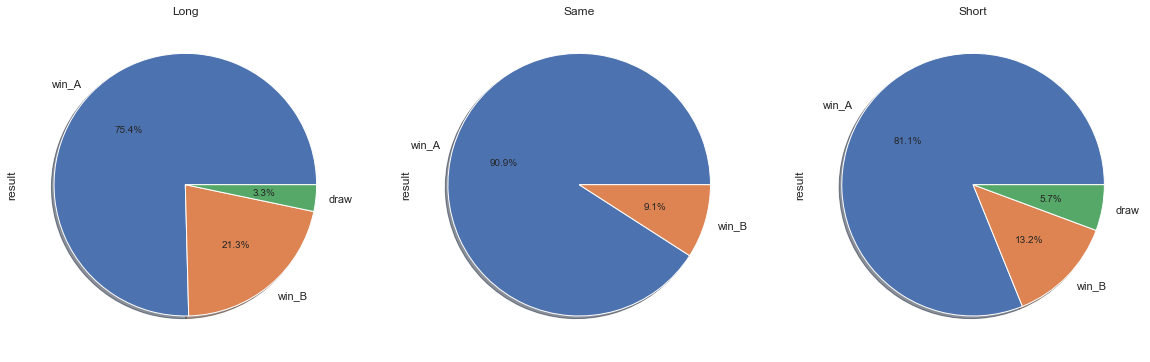

In [72]:
f,ax = plt.subplots(1,3,figsize=(20,7))

#boxing_data['result'][boxing_data['height_diff'] < 0].value_counts().plot.pie()
#boxing_data['result'][boxing_data['height_diff'] < 0].value_counts().plot.pie()


boxing_data_reach['result'][boxing_data_reach['reach_dec'] == 'Long'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
boxing_data_reach['result'][boxing_data_reach['reach_dec'] == 'Same'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
boxing_data_reach['result'][boxing_data_reach['reach_dec'] == 'Short'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('Long')
ax[1].set_title('Same')
ax[2].set_title('Short')

__Observation:__ Here we see almost an opposite outcome. We realised, if all other physical attributes are same, then reach plays a negative role in deciding the outcome. More the reach lesser is the change to win for boxer A.

<a name="section5"></a>

## 5. Conclusion 

- We see that boxers with better physical attributes have beter chance of winning the bout
- Age and Height Speccially play a crucial role in deciding the outcome of the fight
- Range also plays a crucial role in deciding the outcome, but not as effective as the other two, as Range didn't perform well when we set other parameters/attributes as same. 
- We are aware that stance plays a crucial role as well, but the data we had only had details of boxers fighter with other boxers with similar stance
- We also noticed that boxers with better physical attributes also win the fight more dominantly.
- The dataset provided had more winners as Boxer A. Hence we saw more than 50% winning percentage in either case. However it doesnt affect our analysis.